In [79]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [47]:
raw_data = pd.read_csv (r'C:\Users\blync\Downloads\EOD-NKE.csv') #Loading in data concerned with price and volume
raw_data2 = pd.read_csv (r'C:\Users\blync\Downloads\EOD-NKE (1).csv') #Loading in data concerned with percent changes in price and volume

In [2]:
raw_data

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
0,2017-12-28,63.00,63.320,62.85,62.95,3987151.0,0.0,1.0,61.478097,61.790366,61.331720,61.429305,3987151.0
1,2017-12-27,63.56,63.600,62.77,62.95,8959745.0,0.0,1.0,62.024569,62.063602,61.253653,61.429305,8959745.0
2,2017-12-26,62.90,63.890,62.81,63.65,4563475.0,0.0,1.0,61.380512,62.346597,61.292687,62.112395,4563475.0
3,2017-12-22,61.21,63.540,60.13,63.29,20413895.0,0.0,1.0,59.731338,62.005052,58.677428,61.761091,20413895.0
4,2017-12-21,64.33,64.980,63.30,64.77,14312589.0,0.0,1.0,62.775968,63.410265,61.770850,63.205338,14312589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,2013-09-09,65.06,65.590,64.93,65.40,2073900.0,0.0,1.0,30.167828,30.413585,30.107548,30.325484,4147800.0
1086,2013-09-06,65.40,65.550,64.17,64.98,2316300.0,0.0,1.0,30.325484,30.395038,29.755142,30.130733,4632600.0
1087,2013-09-05,65.00,65.575,64.69,65.38,2635800.0,0.0,1.0,30.140007,30.406630,29.996262,30.316210,5271600.0
1088,2013-09-04,64.33,65.485,64.30,65.13,3550700.0,0.0,1.0,29.829333,30.364898,29.815422,30.200287,7101400.0


In [7]:
closing_price = raw_data[['Close', 'Adj_Close']]
closing_price['Close_Dif'] = closing_price['Close'] - closing_price['Adj_Close']
closing_price['Close_Percent_Dif'] = (closing_price['Close'] - closing_price['Adj_Close'])/closing_price['Close']
closing_price

C:\Users\blync\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\blync\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Close,Adj_Close,Close_Dif,Close_Percent_Dif
0,62.95,61.429305,1.520695,0.024157
1,62.95,61.429305,1.520695,0.024157
2,63.65,62.112395,1.537605,0.024157
3,63.29,61.761091,1.528909,0.024157
4,64.77,63.205338,1.564662,0.024157
...,...,...,...,...
1085,65.40,30.325484,35.074516,0.536308
1086,64.98,30.130733,34.849267,0.536308
1087,65.38,30.316210,35.063790,0.536308
1088,65.13,30.200287,34.929713,0.536308


In [22]:
high_low = raw_data[['High', 'Low', 'Volume', 'Open', 'Close']]
high_low['High_Low_Dif'] = high_low['High'] - high_low['Low']
high_low['High_Low_P_Dif'] = (high_low['High'] - high_low['Low'])/high_low['High']
high_low['Dif/Vol'] = high_low['High_Low_Dif']/high_low['Volume']
high_low['Dif/Vol*10E7'] = high_low['Dif/Vol']*10**7
high_low['High_Low_P_Dif/Vol*10E7']=high_low['High_Low_P_Dif']/(high_low['Volume']*10**-7)
high_low['Close/Open'] = high_low['Close']/high_low['Open']
high_low

C:\Users\blync\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\blync\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\blync\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,High,Low,Volume,Open,Close,High_Low_Dif,High_Low_P_Dif,Dif/Vol,Dif/Vol*10E7,High_Low_P_Dif/Vol*10E7,Close/Open
0,63.320,62.85,3987151.0,63.00,62.95,0.470,0.007423,1.178787e-07,1.178787,0.018616,0.999206
1,63.600,62.77,8959745.0,63.56,62.95,0.830,0.013050,9.263656e-08,0.926366,0.014565,0.990403
2,63.890,62.81,4563475.0,62.90,63.65,1.080,0.016904,2.366618e-07,2.366618,0.037042,1.011924
3,63.540,60.13,20413895.0,61.21,63.29,3.410,0.053667,1.670431e-07,1.670431,0.026289,1.033981
4,64.980,63.30,14312589.0,64.33,64.77,1.680,0.025854,1.173792e-07,1.173792,0.018064,1.006840
...,...,...,...,...,...,...,...,...,...,...,...
1085,65.590,64.93,2073900.0,65.06,65.40,0.660,0.010063,3.182410e-07,3.182410,0.048520,1.005226
1086,65.550,64.17,2316300.0,65.40,64.98,1.380,0.021053,5.957777e-07,5.957777,0.090889,0.993578
1087,65.575,64.69,2635800.0,65.00,65.38,0.885,0.013496,3.357614e-07,3.357614,0.051203,1.005846
1088,65.485,64.30,3550700.0,64.33,65.13,1.185,0.018096,3.337370e-07,3.337370,0.050964,1.012436


In [26]:
high_low.corr()

,High,Low,Volume,Open,Close,High_Low_Dif,High_Low_P_Dif,Dif/Vol,Dif/Vol*10E7,High_Low_P_Dif/Vol*10E7,Close/Open
High,1.000000,0.999548,-0.499268,0.999721,0.999700,0.488541,-0.005721,0.802222,0.802222,0.607690,-0.028215
Low,0.999548,1.000000,-0.511541,0.999620,0.999656,0.462098,-0.034397,0.795450,0.795450,0.600096,-0.028388
Volume,-0.499268,-0.511541,1.000000,-0.504069,-0.504595,0.118941,0.480029,-0.560781,-0.560781,-0.578850,0.043122
Open,0.999721,0.999620,-0.504069,1.000000,0.999310,0.478208,-0.017929,0.798919,0.798919,0.603792,-0.046217
Close,0.999700,0.999656,-0.504595,0.999310,1.000000,0.476558,-0.018079,0.799384,0.799384,0.604518,-0.010886
High_Low_Dif,0.488541,0.462098,0.118941,0.478208,0.476558,1.000000,0.829854,0.578013,0.578013,0.509392,-0.008385
High_Low_P_Dif,-0.005721,-0.034397,0.480029,-0.017929,-0.018079,0.829854,1.000000,0.190238,0.190238,0.236726,0.045569
Dif/Vol,0.802222,0.795450,-0.560781,0.798919,0.799384,0.578013,0.190238,1.000000,1.000000,0.942731,-0.013046
Dif/Vol*10E7,0.802222,0.795450,-0.560781,0.798919,0.799384,0.578013,0.190238,1.000000,1.000000,0.942731,-0.013046
High_Low_P_Dif/Vol*10E7,0.607690,0.600096,-0.578850,0.603792,0.604518,0.509392,0.236726,0.942731,0.942731,1.000000,-0.002274


In [99]:
lr = LinearRegression()
lr.fit(high_low[['Open']], high_low['Dif/Vol*10E7'])
Fit1_coef = lr.coef_
Fit1_int = lr.intercept_
Fit1_x = np.linspace(min(high_low['Open']), max(high_low['Open']), 1090)
Fit1_line = Fit1_coef * Fit1_x + Fit1_int
correlation = np.corrcoef(high_low['Open'], high_low['Dif/Vol*10E7'])[0,1]
print('The R^2 value for this plot is: ' + "{:.3f}".format(correlation))

The R^2 value for this plot is: 0.799


The line of best fit is: Daily High Price- Daily Low Price / Daily Volume = 0.0711 * Open Price + -2.7053


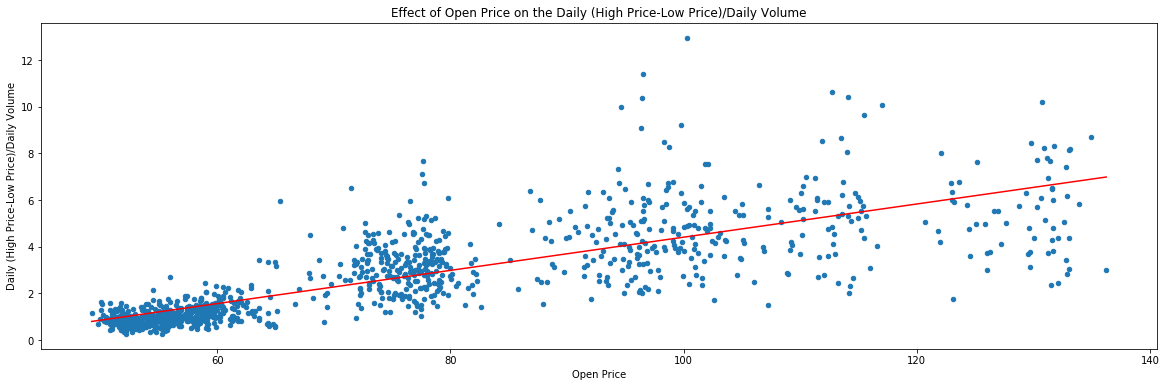

In [117]:
high_low.plot(kind='scatter', x='Open', y = 'Dif/Vol*10E7', figsize=(20, 6))
plt.title('Effect of Open Price on the Daily (High Price-Low Price)/Daily Volume')
plt.xlabel('Open Price')
plt.ylabel('Daily (High Price-Low Price)/Daily Volume')
plt.plot(Fit1_x, Fit1_line, color = 'red')
print('The line of best fit is: Daily High Price- Daily Low Price / Daily Volume = ' + "{:.4f}".format(Fit1_coef[0]) + ' * Open Price + ' + "{:.4f}".format(Fit1_int))

In [101]:
lr2 = LinearRegression()
lr2.fit(high_low[['Open']], high_low['High'])
Fit2_coef = lr2.coef_
Fit2_int = lr2.intercept_
Fit2_x = np.linspace(min(high_low['Open']), max(high_low['Open']), 1090)
Fit2_line = Fit2_coef * Fit2_x + Fit2_int
correlation2 = np.corrcoef(high_low['Open'], high_low['High'])[0,1]
print('The R^2 value for this plot is: ' + "{:.4f}".format(correlation2))

The R^2 value for this plot is: 0.9997


The line of best fit is: Daily High Price = 1.0059 * Open Price + 0.1538


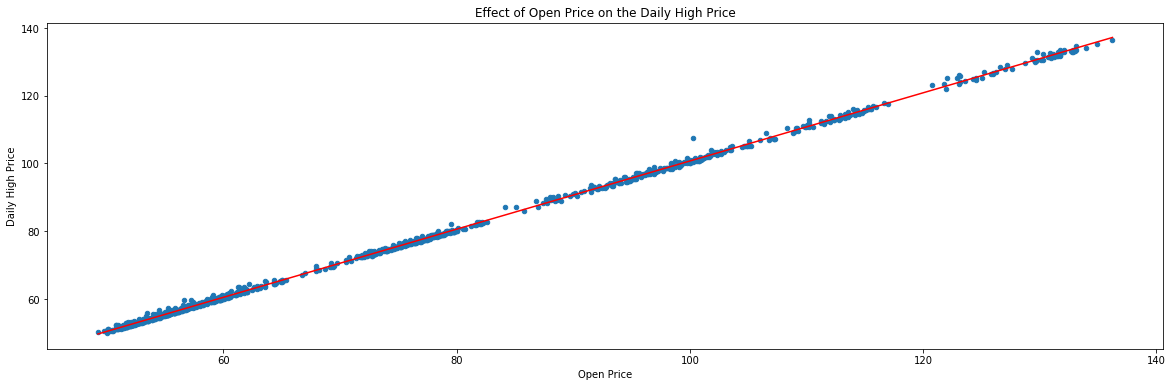

In [115]:
high_low.plot(kind='scatter', x='Open', y = 'High', figsize=(20, 6))
plt.title('Effect of Open Price on the Daily High Price')
plt.xlabel('Open Price')
plt.ylabel('Daily High Price')
plt.plot(Fit2_x, Fit2_line, color = 'red')
print('The line of best fit is: Daily High Price = ' + "{:.4f}".format(Fit2_coef[0]) + ' * Open Price + ' + "{:.4f}".format(Fit2_int))

In [51]:
raw_data2

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
0,2017-12-28,-0.008811,-0.004403,0.001274,0.000000,-0.554993,NaN,0.0,-0.008811,-0.004403,0.001274,0.000000,-0.554993
1,2017-12-27,0.010493,-0.004539,-0.000637,-0.010998,0.963360,NaN,0.0,0.010493,-0.004539,-0.000637,-0.010998,0.963360
2,2017-12-26,0.027610,0.005508,0.044570,0.005688,-0.776453,NaN,0.0,0.027610,0.005508,0.044570,0.005688,-0.776453
3,2017-12-22,-0.048500,-0.022161,-0.050079,-0.022850,0.426289,NaN,0.0,-0.048500,-0.022161,-0.050079,-0.022850,0.426289
4,2017-12-21,-0.001087,0.007442,-0.004404,0.018556,0.147991,NaN,0.0,-0.001087,0.007442,-0.004404,0.018556,0.147991
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,2013-09-10,0.025208,0.021192,0.015863,0.021713,2.225806,NaN,0.0,0.025208,0.021192,0.015863,0.021713,2.225806
1085,2013-09-09,-0.005199,0.000610,0.011844,0.006464,-0.104650,NaN,0.0,-0.005199,0.000610,0.011844,0.006464,-0.104650
1086,2013-09-06,0.006154,-0.000381,-0.008038,-0.006118,-0.121216,NaN,0.0,0.006154,-0.000381,-0.008038,-0.006118,-0.121216
1087,2013-09-05,0.010415,0.001374,0.006065,0.003838,-0.257668,NaN,0.0,0.010415,0.001374,0.006065,0.003838,-0.257668


In [68]:
p_change_data = raw_data2[['Open','High','Low','Close','Volume']]
p_change_data.drop(p_change_data[p_change_data['Open']<-0.2].index, inplace=True)

The R^2 value for this plot is: 0.421


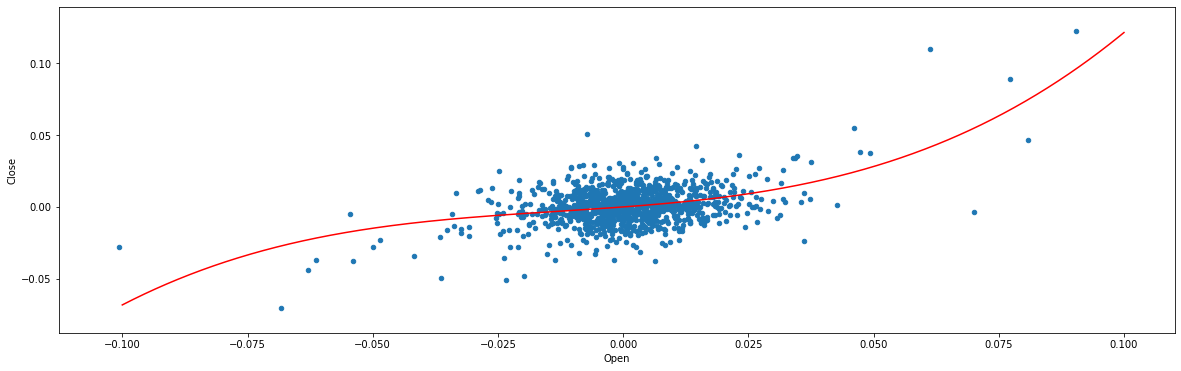

In [110]:
a = p_change_data['Open']
b = p_change_data['Close']
x = np.linspace(-0.1, 0.1, 1088)
fit = np.polyfit(a, b, 3)
p = np.poly1d(fit)
p_change_data.plot(kind='scatter', x='Open', y = 'Close', figsize=(20, 6))
plt.plot(x, p(x), color = 'red')

correlation3 = np.corrcoef(a, b)[0,1]
print('The R^2 value for this plot is: ' + "{:.3f}".format(correlation3))

In [95]:
print('Percent Change of Daily Close Value = ' "{:.5f}".format(p[0]) + ' * x^3 + ' "{:.2f}".format(p[1]) + ' * x^2 + ' "{:.2f}".format(p[2]) + ' *x + ' "{:.2f}".format(p[3]) + ', where x is the Percent Change in the Daily Open Price')

Percent Change of Daily Close Value = -0.00004 * x^3 + 0.26 * x^2 + 2.66 *x + 69.15, where x is the Percent Change in the Daily Open Price


In [103]:
lr3 = LinearRegression()
lr3.fit(p_change_data[['Open']], p_change_data['High'])
Fit3_coef = lr3.coef_
Fit3_int = lr3.intercept_
Fit3_x = np.linspace(min(p_change_data['Open']), max(p_change_data['Open']), 1090)
Fit3_line = Fit3_coef * Fit3_x + Fit3_int
correlation4 = np.corrcoef(p_change_data['Open'], p_change_data['High'])[0,1]
print('The R^2 value for this plot is: ' + "{:.4f}".format(correlation4))

The R^2 value for this plot is: 0.7387


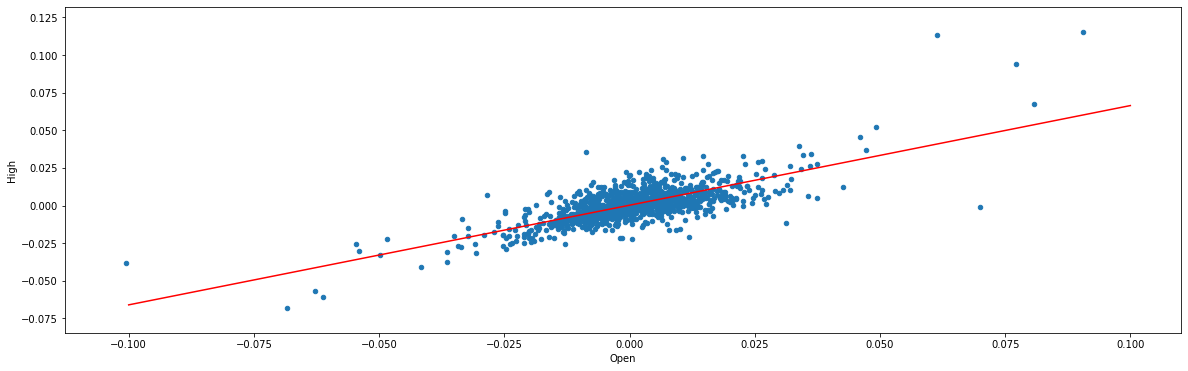

In [105]:
c = p_change_data['Open']
d = p_change_data['High']
x = np.linspace(-0.1, 0.1, 1088)
fit = np.polyfit(c, d, 1)
p1 = np.poly1d(fit)
p_change_data.plot(kind='scatter', x='Open', y = 'High', figsize=(20, 6))
plt.plot(x, p1(x), color = 'red')

In [109]:
print('Percent Change of High Price = ' "{:.5f}".format(p1[0]) + ' * Percent Change of Open Price + '"{:.2f}".format(p1[1]))

Percent Change of High Price = 0.00023 * Percent Change of Open Price + 0.66
